<h1 style="color: navy; text-align: center;"> JOB SATISFACTION ANALYSIS </h1>

<h4 style="color: orange; text-align: center">[ Job Demands-Resources Model ] &nbsp; &nbsp; </h4>

<p style="text-align: center; font-size: 14px; color: maroon">
Shaurya Choudhary - 18BCE2113 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;
</p>

<h2 id='Project'>A Look at the Data</h2>

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

<h3 id='DataX'>Data Exploration</h3>


In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

df = pd.read_csv('../Data/survey_results_public.csv')
schema = pd.read_csv('../Data/survey_results_schema.csv')
reader = csv.reader(open('../Data/countryRegionDic.csv'))
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Displaying Column Descriptions of Dataset

styles = [dict(selector = "th", props = [('text-align', 'center')])]

with pd.option_context('display.max_colwidth', 300):
    display(schema.head().style.set_properties(**{'text-align': 'left'}).set_table_styles(styles))


,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to open source projects?
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree-granting college or university program?"


In [4]:
#This code was used to help generate the country to world region dictionary csv file
# Sending Schema to an Excel file for closer inspection
#schema.to_excel('schema.xlsx')

#Sending column Country to an excel file for closer inspection
#df['Country'].to_excel('country.xlsx')

In [5]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of cols in the dataset
num_countries = df['Country'].nunique() #provide number of countries spanning the surveys

print('number of rows: ',num_rows)
print('number of columns: ',num_cols)
print('Number of countries:' , num_countries)

number of rows:  19102
number of columns:  154
Number of countries: 165


In [6]:
#Provide a set of columns with 0 missing values.
no_nulls = set(df.columns[df.isnull().mean()==0])

print(no_nulls)

{'Professional', 'Country', 'FormalEducation', 'Respondent', 'EmploymentStatus', 'ProgramHobby', 'University'}


In [7]:
#Provide a set of columns with less than 25% missing values but not 0 missing.
twentyfive_zero_nulls = set(df.columns[df.isnull().mean() <= 0.25])
twentyfive_nulls = twentyfive_zero_nulls - no_nulls

print(twentyfive_nulls)

{'JobSatisfaction', 'ClickyKeys', 'YearsProgram', 'PronounceGIF', 'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'CareerSatisfaction', 'YearsCodedJob'}


In [8]:
#Provide a set of columns with all missing values.
all_nulls = set(df.columns[df.isnull().mean() == 1])

print(all_nulls)

set()


In [9]:
#Provide a set of columns with 75% + missing values.
most_nulls = set(df.columns[df.isnull().mean() > 0.75])

print(most_nulls)

{'ExCoderNotForMe', 'ExCoderBelonged', 'ExCoderBalance', 'TimeAfterBootcamp', 'YearsCodedJobPast', 'WebDeveloperType', 'ExCoderSkills', 'ExCoderActive', 'NonDeveloperType', 'ExCoderWillNotCode', 'ExCoder10Years', 'ExCoderReturn', 'MobileDeveloperType', 'ExpectedSalary'}


<h3 id='DataX'>Helper Functions</h3>


In [10]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    
    print(desc)
    
    return

def get_survey_vals(column_name, num_vals, dataset = df):
    '''
    Provide the first values of a specific column i the dataset
    
    INPUT: - A string for the column name of interest
           - Integer for the number of values of interest
           - the dataset of interest
           
    OUTPUT: - the first num_vals values of the column of interest
    '''
    col = dataset[column_name].head(num_vals)
    
    print(col)
    
    return

In [11]:
get_description('JobSatisfaction');
get_survey_vals('JobSatisfaction', 20);

Job satisfaction rating
0     NaN
1     NaN
2     9.0
3     3.0
4     8.0
5     NaN
6     6.0
7     7.0
8     6.0
9     8.0
10    9.0
11    6.0
12    NaN
13    6.0
14    8.0
15    8.0
16    NaN
17    8.0
18    3.0
19    8.0
Name: JobSatisfaction, dtype: float64


In [12]:
"""
Creating a dictionary to assign a world region to a country.
dictionary is created from a CSV file containing all countries 
in the Stackoverflow dataset to which a world region has been assigned.
"""

country2Region_dic={}
for row in reader:
    country2Region_dic[row[0]]=row[1]

##print(country2Region_dic)

"""
Adding a column to the dataset dataframe defining world region from the country column
"""
  
# Mapping the dictionary keys to the data frame. 
df['WorldRegion'] = df['Country'].map(country2Region_dic) 
df.head() 

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,WorldRegion
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN,North America
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0,Europe
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN,Europe
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,North America
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe


In [13]:
def get_world_region(country, dic = country2Region_dic):
    """
    This function looks up the world region for a given country
    
    INPUT: - country: a text string 
           - a dictionary mapping the world region to each country in the dataset
             the dictionary is created fomr an imported csv delimite file './countryRegionDic.csv'
    OUTPUT: - prints the World region a country is in
    """
    
    print(dic[country])
    
    return
    
    
def get_regions():
    '''
    This function retrieves all the regions represented in the dataset
    
    INPUT: - a dictionary mapping the world region to each country in the dataset
             the dictionary is created fomr an imported csv delimite file './countryRegionDic.csv'
             
    OUTPUT: - list of World Regions represented in the dataset assigned via the dictionary
    '''
    
    print(sorted(list(set(list(country2Region_dic.values())[1:]))))
    
    return
    
def get_countries(world_region):
    ''' This function retrieves all of the countries represented in a world region
    
    INPUT: - world_region:  a string of the world region of interest
           - a dictionary mapping the world region to each country in the dataset
             the dictionary is created fomr an imported csv delimite file './countryRegionDic.csv'
    
    OUTPUT: - A list of countries in the world region of interest
    '''
    
    for country, region in country2Region_dic.items():
        if region == world_region:
            print(country)
            
    return

get_regions()
get_world_region('China')
get_countries('South Central Asia')         

['Africa', 'Antarctica', 'Asia', 'Caribbean', 'Central America', 'Eastern Europe', 'Europe', 'Global', 'Middle East', 'North America', 'Oceania', 'South America', 'South Central Asia', 'South East Asia']
Asia
Afghanistan
Bangladesh
Bhutan
India
Kazakhstan
Kyrgyzstan
Nepal
Pakistan
Sri Lanka
Tadjikistan
Uzbekistan


<h3 id='Q1'>Question 1: Does Job Satisfaction Vary by World Region? </h3>


<p id='Q1'>Below we can see that the vast majority of respondents is from the U.S.A when looked at by individual country.  However when grouping the respondents by world region rather than investigaintg by country we can see that respondents come mainly from 2 Regions, which represent about 30% of the respondents each:

    - North America
    - Europe
    
This is followed at some distance by:

    - Eastern Europe
    - South Central Asia
    
which represent approximately 10% of respondents each.

In total, the above world regions represent about 80 % of all repondents to the survey.  Therefore I will continue my analyses for only these 4 regions and furthermore i will be mostly concentrating on North America and Europe.<p>

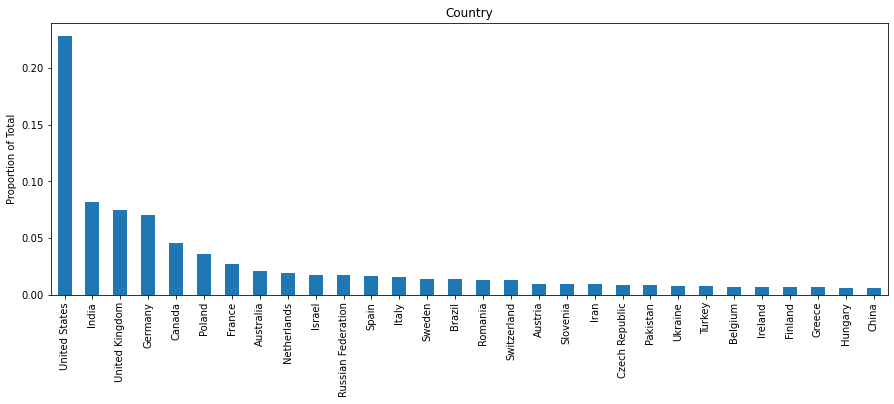

In [15]:
#Provide a pandas series of the counts for country represented
count_vals = df.Country.value_counts()

# print(count_vals)

# below a bar chart of the proportion of individuals in each country for the top 30 countries
plt.figure(figsize=(15,5))
(count_vals[:30]/df.shape[0]).plot(kind="bar");
plt.ylabel("Proportion of Total")
plt.title("Country");

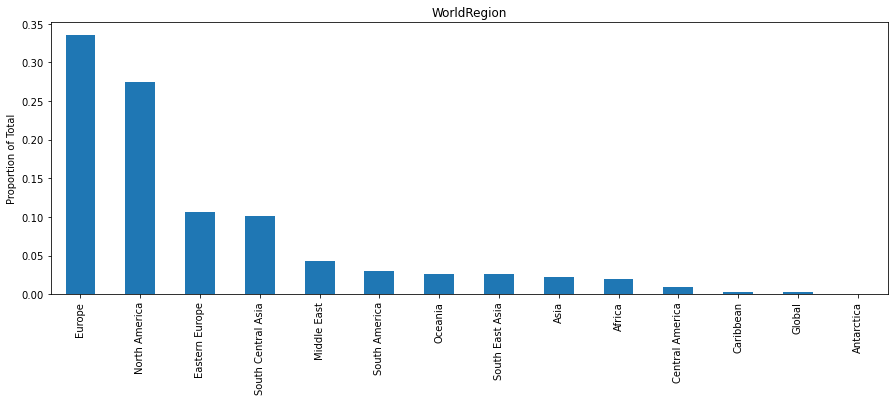

In [17]:
#Provide a pandas series of the counts for each World Region
count_vals = df.WorldRegion.value_counts()

# below a bar chart of the proportion of individuals in each World Region
plt.figure(figsize=(15,5))
(count_vals/df.shape[0]).plot(kind="bar");
plt.ylabel("Proportion of Total")
plt.title("WorldRegion");

<p id='Q1'>
When looking for job satisfaction I will be looking at the 'JobSatisfaction' and the 'JobSeekingStatus' columns in the dataset.
    
Furthermore, over 80% are professionals, either developers or non-developers with some coding experience.  For this reason I will be concentrating on them and not include students or others. 
<p>

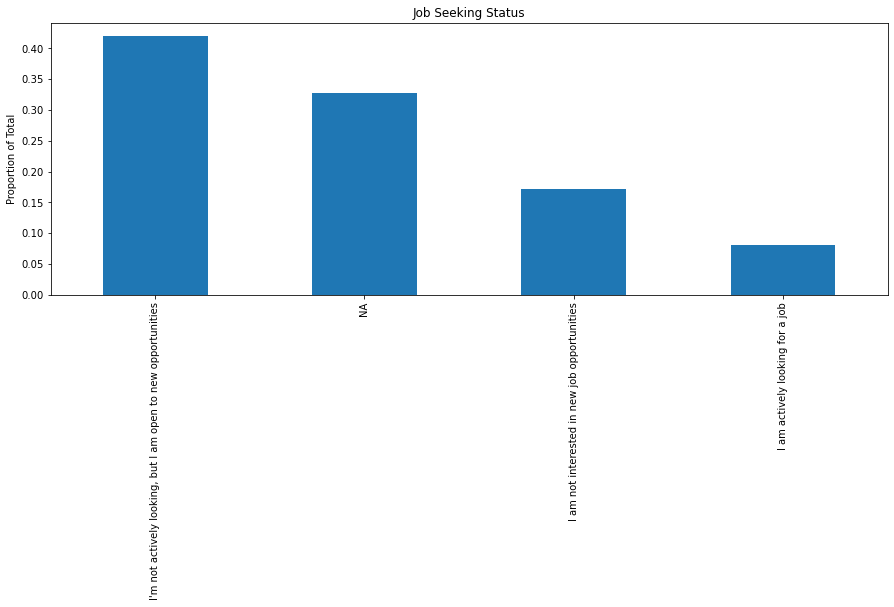

In [18]:
#Provide a pandas series of the counts for each Job Seeking Status
df['JobSeekingStatus'].fillna(value = 'NA', inplace = True)
count_vals = df.JobSeekingStatus.value_counts()

# below a bar chart of the proportion of individuals for each Job Seeking Status
plt.figure(figsize=(15,5))
(count_vals/df.shape[0]).plot(kind="bar")
plt.ylabel("Proportion of Total")
plt.title("Job Seeking Status");

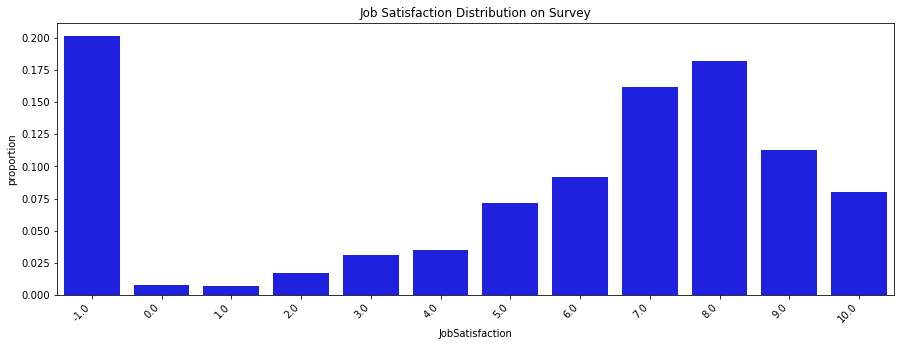

In [19]:
#Provide a pandas series of the counts for each Job Satisfaction value

df['JobSatisfaction'].fillna(value = -1, inplace = True) # replacing Nans with -1
#df['JobSatisfaction'].apply(pd.to_numeric)
df_sorted = df.sort_values('JobSatisfaction', ascending=True) #.reset_index(inplace=True)
count_vals = df_sorted.JobSatisfaction.value_counts()
df_count_vals = pd.DataFrame(
                data=count_vals,
                )
df_count_vals.reset_index(level=0, inplace=True)
df_count_vals.columns = ['JobSatisfaction','Count']
df_count_vals['proportion'] = df_count_vals['Count']/df.shape[0]

# below a bar chart of the proportion of individuals for each Job Seeking Status

#(count_vals/df.shape[0]).plot(kind="bar");
#plt.title("Job Satisfaction");

plt.figure(figsize=(15,5))

chart = sns.barplot(data = df_count_vals,
                    x = 'JobSatisfaction', 
                    y = 'proportion',
                    #hue = 'WorldRegion',
                    ci = None,
                    color = 'b')
chart.set_title('Job Satisfaction Distribution on Survey')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');
#chart.legend(loc='center left', bbox_to_anchor=(1.25, 0.0), ncol=1);



JobSeekingStatus
I am actively looking for a job                                 [0]
I am not interested in new job opportunities                    [1]
I'm not actively looking, but I am open to new opportunities    [2]
NA                                                              [3]
dtype: object


<Figure size 1080x360 with 0 Axes>

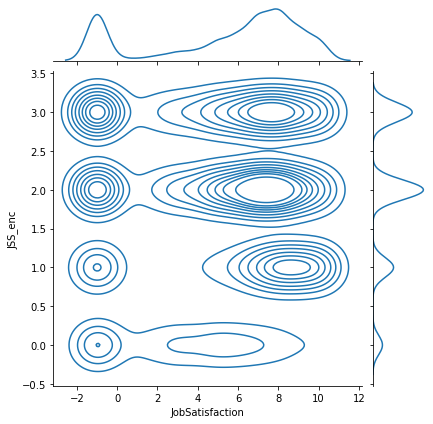

In [20]:
# need to encode the categorical values of JobSeekingStatus to a numerical value put in a new column JSS_enc

labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
#df = df[['Product_Code', 'Country_Code']].apply(le.fit_transform)

df['Gender'].fillna(value = 'NA', inplace = True)

df['JSS_enc'] = df[['JobSeekingStatus']].apply(labelencoder.fit_transform)
df['G_enc'] = df[['Gender']].apply(labelencoder.fit_transform)
df_enc = df

#Filtering out the non response for job satisfaction
#df_enc = df_enc[df_enc['JobSatisfaction'] != -1.0]

# This prints the mapping between the JobSeeking Status and the encoded value JSS_enc
print(df_enc[['JobSeekingStatus','JSS_enc']].groupby('JobSeekingStatus').apply(lambda x: x['JSS_enc'].unique()));


plt.figure(figsize=(15,5));
chart = sns.jointplot(data = df_enc,
            x = 'JobSatisfaction', 
            y = 'JSS_enc',
            #hue = 'JobSeekingStatus',
            #ci = None,
            kind = 'kde');
#chart.set_title('Job Seeking Status vs. Job Satisfaction')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#chart.legend(loc='center left', bbox_to_anchor=(0.3, -0.5), ncol=1);

<p id='Q1'>
The above plot shows us the correlaton and spread between job satisfaction and job seeking status.
    
    
So, if we concentrate on the right side of the plot we can see a low job satisfaction relating to people actively looking for a job (0 on JSS_enc) and a high job satisfaction relating to people not looking for a job at all (1 on JSS_enc).
A high number of respondents with Job Satisfaction around 7.5 are very open to new opportunities but are not actively seeking (2 on JSS_enc)
    <p>

In [21]:
'''
Filter dataset on:
    - Gender
    - WorldRegion : - Eastern Europe
                    - Europe
                    - North America and
                    - South Central Asia
'''

df_enc = df_enc[df_enc.Gender.isin(['Male', 
                                    'Female'])]
df_enc = df_enc[df_enc.WorldRegion.isin(['Eastern Europe', 
                                         'Europe', 
                                         'North America', 
                                         'South Central Asia'])]

# Grouping Dataset to get the count per occurence
count = df_enc.groupby(['WorldRegion',
                        'Gender',
                        'JobSeekingStatus',
                        'JobSatisfaction',
                        ]).count() 

# resetting index
count.reset_index(inplace=True)

# adding column representing percentage of counts of above group by over total occurrences
count['resp_ratio'] = 100 * count['Respondent']/count['Respondent'].sum()


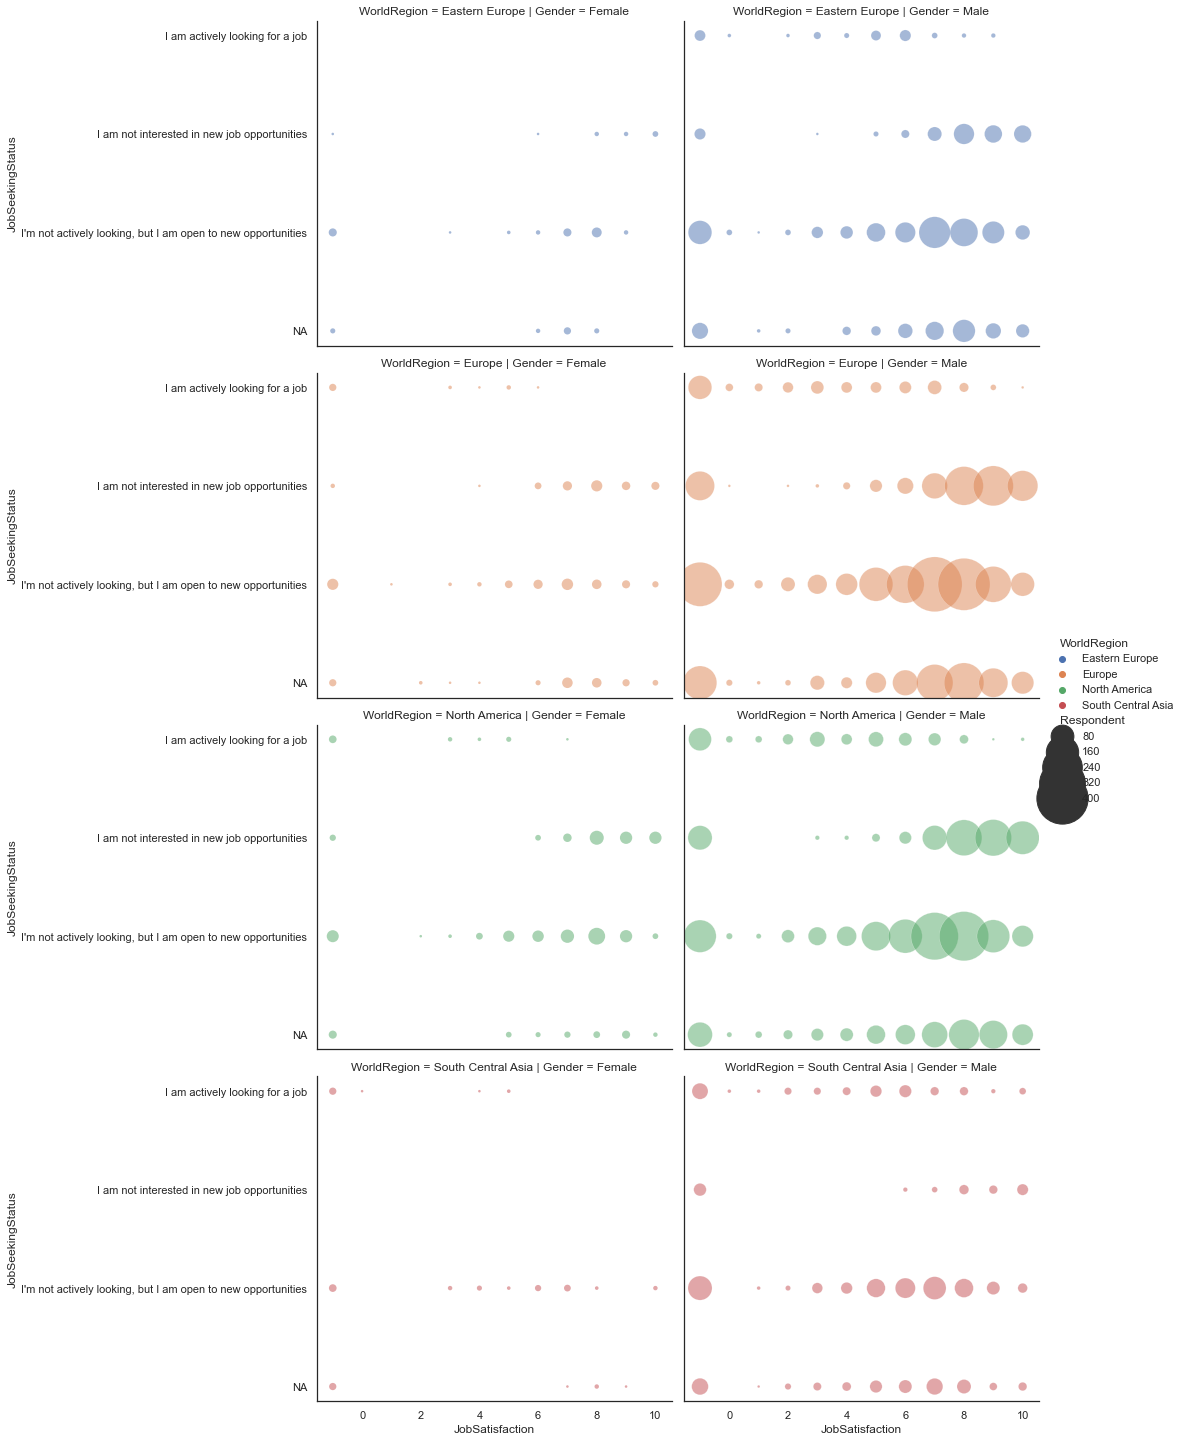

In [22]:
# Plot filtered counts by job satisfactoin and Job Seeking status broken by Gender and world region
sns.set(style="white", font_scale = 1)

chart = sns.relplot(x='JobSatisfaction', 
                    y='JobSeekingStatus', 
                    hue='WorldRegion', 
                    size='Respondent',
                    sizes=(0, 3000), 
                    alpha=.5, 
                    #palette="muted",
                    height=5,
                    aspect = 1.5,
                    legend = 'brief',
                    col = 'Gender',
                    row = 'WorldRegion',
                    size_order = ('EasternEurope', 'Europe', 'North America', 'South Central Asia'),
                    data=count)
#chart.set_title('Job Seeking Status vs. Job Satisfaction by Region and Gender')

#### <p id='Q1'>
The Above 4 charts show the distribution of the job Seeking Status and job Satisfaction at survey level and the correlation between the 2.  The last chart above does provide a Gender Break down as well and will be used lateron in this project. 

The following charts show what kind of jobs and formal education the respondents have.
<p>

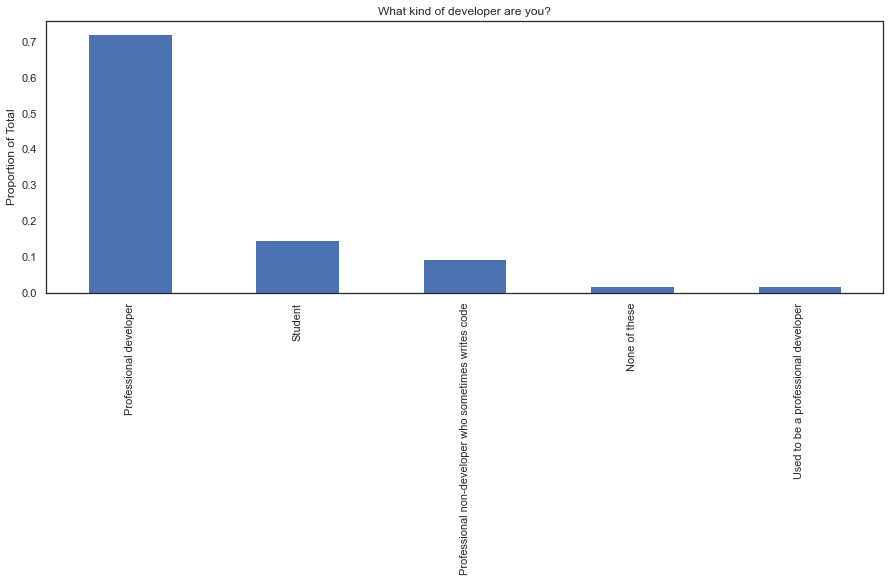

In [23]:
#Provide a pandas series of the counts for each Professional status

status_vals = df.Professional.value_counts()#Provide a pandas series of the counts for each Professional status

plt.figure(figsize=(15,5))
(status_vals/df.shape[0]).plot(kind="bar")
plt.ylabel("Proportion of Total")
plt.title("What kind of developer are you?");

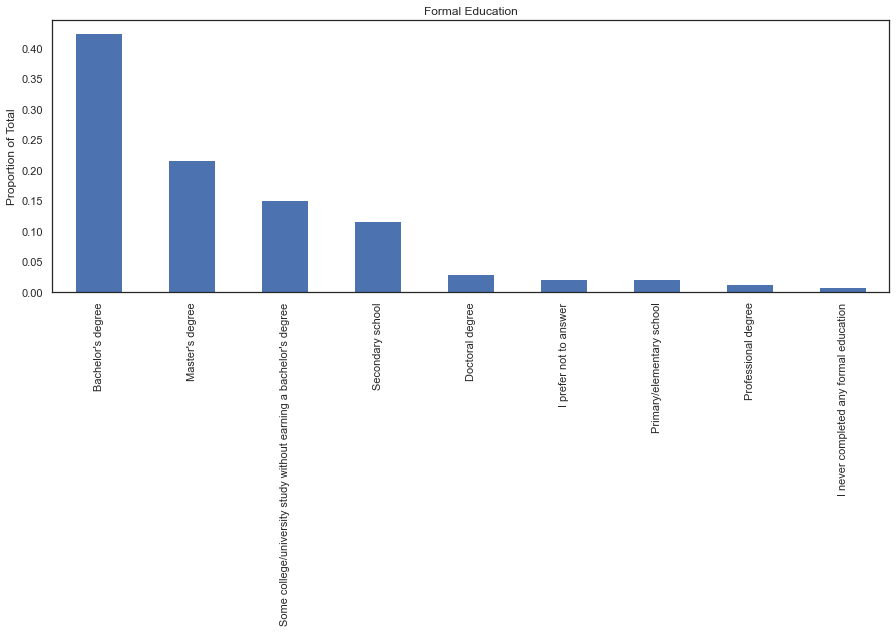

In [24]:
# counts for each FormalEducation status
ed_vals = df.FormalEducation.value_counts()

# a bar chart of the proportion of individuals' Formal Education
plt.figure(figsize=(15,5))
(ed_vals/df.shape[0]).plot(kind="bar")
plt.ylabel("Proportion of Total")
plt.title("Formal Education");



<p id='Q1'>
    
    
Digging in deeper looking at professionals and the 4 world regions of interest:
<p>

In [25]:
# Among all professionals, developers or non-developers 

# Find Number of Respondents by Region
regionalRespondents = pd.DataFrame(df.query("(Professional == 'Professional developer' or \
                                        Professional == 'Professional non-developer who sometimes writes code') \
                                        and \
                                       (WorldRegion == 'Europe' or \
                                        WorldRegion == 'North America' or \
                                        WorldRegion == 'Eastern Europe' or \
                                        WorldRegion == 'South Central Asia')"). \
                      groupby(['WorldRegion']).count()['Professional'])

# Determine job seeking status
regionalJobSeekers = pd.DataFrame(df.query("(Professional == 'Professional developer' or \
                                    Professional == 'Professional non-developer who sometimes writes code') \
                                    and \
                                   (WorldRegion == 'Europe' or \
                                    WorldRegion == 'North America' or \
                                    WorldRegion == 'Eastern Europe' or \
                                    WorldRegion == 'South Central Asia')"). \
                     groupby(['WorldRegion', 'JobSeekingStatus']).count()['Respondent'])


# Display Job Satisfaction based on Job Seeking Status by world region
regionalSatisfaction = regionalJobSeekers.join(regionalRespondents)
regionalSatisfaction['regionalRatio'] = 100 * regionalSatisfaction['Respondent'] / regionalSatisfaction['Professional']
regionalSatisfaction

Respondent  \
WorldRegion        JobSeekingStatus                                                 
Eastern Europe     I am actively looking for a job                             95   
                   I am not interested in new job opportunities               283   
                   I'm not actively looking, but I am open to new ...         778   
                   NA                                                         541   
Europe             I am actively looking for a job                            285   
                   I am not interested in new job opportunities              1050   
                   I'm not actively looking, but I am open to new ...        2283   
                   NA                                                        1606   
North America      I am actively looking for a job                            310   
                   I am not interested in new job opportunities               976   
                   I'm not actively looking, but I am open to new ...        1879   
                   NA                                                        1220   
South Central Asia I am actively looking for a job                            212   
                   I am not interested in new job opportunities               103   
                   I'm not actively looking, but I am open to new ...         587   
                   NA                                                         556   

                                                                       Professional  \
WorldRegion        JobSeekingStatus                                                   
Eastern Europe     I am actively looking for a job                             1697   
                   I am not interested in new job opportunities                1697   
                   I'm not actively looking, but I am open to new ...          1697   
                   NA                                                          1697   
Europe             I am actively looking for a job                             5224   
                   I am not interested in new job opportunities                5224   
                   I'm not actively looking, but I am open to new ...          5224   
                   NA                                                          5224   
North America      I am actively looking for a job                             4385   
                   I am not interested in new job opportunities                4385   
                   I'm not actively looking, but I am open to new ...          4385   
                   NA                                                          4385   
South Central Asia I am actively looking for a job                             1458   
                   I am not interested in new job opportunities                1458   
                   I'm not actively looking, but I am open to new ...          1458   
                   NA                                                          1458   

                                                                       regionalRatio  
WorldRegion        JobSeekingStatus                                                   
Eastern Europe     I am actively looking for a job                          5.598114  
                   I am not interested in new job opportunities            16.676488  
                   I'm not actively looking, but I am open to new ...      45.845610  
                   NA                                                      31.879788  
Europe             I am actively looking for a job                          5.455590  
                   I am not interested in new job opportunities            20.099541  
                   I'm not actively looking, but I am open to new ...      43.702144  
                   NA                                                      30.742726  
North America      I am actively looking for a job                          7.069555  
                

In [26]:
# Resetting Index
regionalSatisfaction.reset_index(inplace=True)


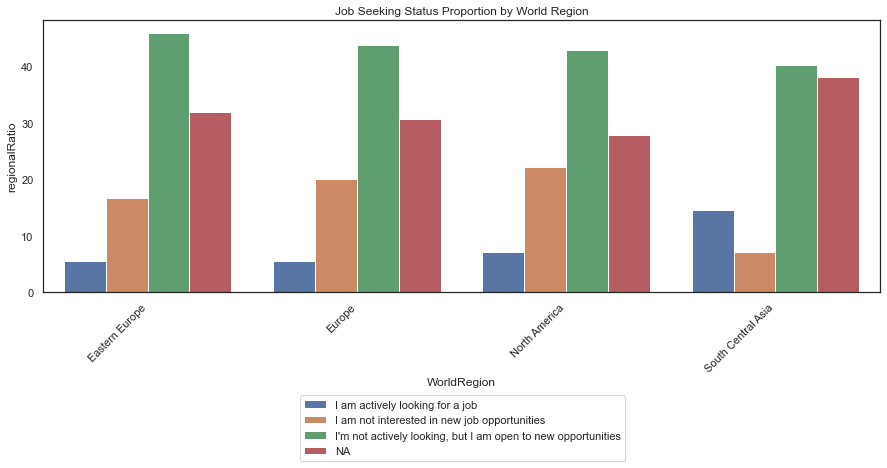

In [27]:
plt.figure(figsize=(15,5))
chart = sns.barplot(data = regionalSatisfaction,
            x = 'WorldRegion', 
            y = 'regionalRatio',
            hue = 'JobSeekingStatus',
            ci = None)
chart.set_title('Job Seeking Status Proportion by World Region')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.legend(loc='center left', bbox_to_anchor=(0.3, -0.5), ncol=1);

In [28]:
# Average Job Satisfaction by World Region

JSWR = pd.DataFrame(df.query("(Professional == 'Professional developer' or \
                                    Professional == 'Professional non-developer who sometimes writes code') \
                                    and \
                                   (WorldRegion == 'Europe' or \
                                    WorldRegion == 'North America' or \
                                    WorldRegion == 'Eastern Europe' or \
                                    WorldRegion == 'South Central Asia')"). \
                     groupby(['WorldRegion']).mean()['JobSatisfaction'])


JSWR

,JobSatisfaction
WorldRegion,
Eastern Europe,6.896288
Europe,6.813744
North America,6.893957
South Central Asia,5.980796


In [29]:
# resetting index
JSWR.reset_index(level=0, inplace=True)


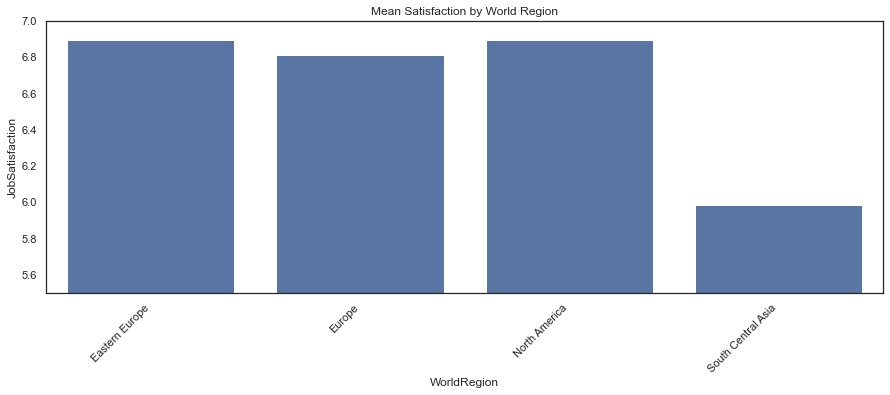

In [30]:
plt.figure(figsize=(15,5))
chart = sns.barplot(data = JSWR,
            x = 'WorldRegion', 
            y = 'JobSatisfaction',
            #hue = 'JobSeekingStatus',
            ci = None,
            color = 'b')
chart.set_title('Mean Satisfaction by World Region')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set(ylim=(5.5, 7));
#chart.legend(loc='center left', bbox_to_anchor=(0.3, -0.5), ncol=1);

In [31]:
# Average Job Satisfaction by World Region and Job Seeking Status

JSWR_JSS = pd.DataFrame(df.query("(Professional == 'Professional developer' or \
                                    Professional == 'Professional non-developer who sometimes writes code') \
                                    and \
                                   (WorldRegion == 'Europe' or \
                                    WorldRegion == 'North America' or \
                                    WorldRegion == 'Eastern Europe' or \
                                    WorldRegion == 'South Central Asia')"). \
                     groupby(['WorldRegion', 'JobSeekingStatus']).mean()['JobSatisfaction'])

JSWR_JSS

JobSatisfaction
WorldRegion        JobSeekingStatus                                                   
Eastern Europe     I am actively looking for a job                            4.589474
                   I am not interested in new job opportunities               8.141343
                   I'm not actively looking, but I am open to new ...         6.704370
                   NA                                                         6.926063
Europe             I am actively looking for a job                            3.989474
                   I am not interested in new job opportunities               7.999048
                   I'm not actively looking, but I am open to new ...         6.618046
                   NA                                                         6.818182
North America      I am actively looking for a job                            3.903226
                   I am not interested in new job opportunities               8.187500
                   I'm not actively looking, but I am open to new ...         6.813199
                   NA                                                         6.743443
South Central Asia I am actively looking for a job                            4.886792
                   I am not interested in new job opportunities               7.446602
                   I'm not actively looking, but I am open to new ...         6.235094
                   NA                                                         5.857914

In [32]:
# Resetting Index
JSWR_JSS.reset_index(inplace=True)


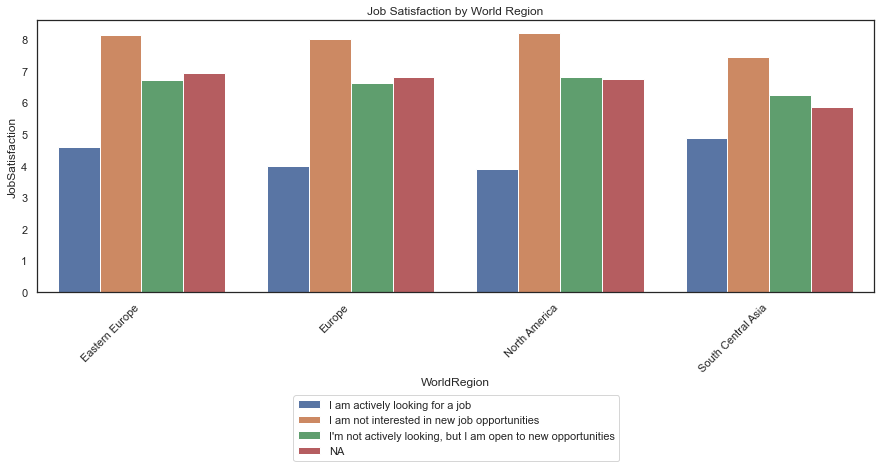

In [33]:
plt.figure(figsize=(15,5))
chart = sns.barplot(data = JSWR_JSS,
            x = 'WorldRegion', 
            y = 'JobSatisfaction',
            hue = 'JobSeekingStatus',
            ci = None)
chart.set_title('Job Satisfaction by World Region')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.legend(loc='center left', bbox_to_anchor=(0.3, -0.5), ncol=1);


<p id='Q1'>
    
    
From the data we can see that the best regions to be in as a professional are  Eastern Europe, Europe and North America.  The number of people looking for a job is the lowest and those who are not interested in a new job the highest, all while the number of people open to new opportunities is high.
    
South Central Asia and Eastern Europe do seem to have less tolerance to bad work conditions as among people who are looking for a job  they have the highest job satisfaction.

Comparing Europe and North America is a little bit more difficult. While Job satisfaction among all catgeories from job seeking status are similar between the 2 regions, Europe does have a lower number of people looking for a job. North America, in contrast, has a higher number of people not looking for a job and both regions compare in looking out for new opportunities.
    
If we were to add the proportion of people not looking for a job and the non respondents for each of these 2 regions, which could be assumed becasue the the job satisfaction fro those non respondents is quite high for both regions, Europe would come out with a slight edge.

In conclusion, if somebody is trying to decide to chose the best world region to work in, Eastern Europe does seem to be an attractive option. If that is not aconsideration, it is pretty much a coin toss between Europe and North America. 
    
In the end it may just come down to lifestyle and culture.
<p>
    
    


<h3 id='q1'>Question 2: How Does Gender influence Job Satisfaction by World Region? </h3>


In [34]:
# Among all professionals, developers or non-developers and Males and Females 

# Find Number of Respondents by Region and Gender
regionalRespondents_G = pd.DataFrame(df.query("(Professional == 'Professional developer' or Professional == 'Professional non-developer who sometimes writes code') \
                                        and \
                                        (Gender == 'Male' or Gender == 'Female')\
                                        and\
                                       (WorldRegion == 'Europe' or WorldRegion == 'North America' or \
                                        WorldRegion == 'Eastern Europe' or WorldRegion == 'South Central Asia')").\
                        groupby(['WorldRegion', 'Gender']).count()['Professional'])

# Determine job seeking status
regionalJobSeekers_G = pd.DataFrame(df.query("(Professional == 'Professional developer' or Professional == 'Professional non-developer who sometimes writes code') \
                                    and \
                                    (Gender == 'Male' or Gender == 'Female')\
                                    and\
                                   (WorldRegion == 'Europe' or WorldRegion == 'North America' or \
                                    WorldRegion == 'Eastern Europe' or WorldRegion == 'South Central Asia')"). \
                     groupby(['WorldRegion', 'JobSeekingStatus', 'Gender']).count()['Respondent'])


# Display Job Satisfaction based on Job Seeking Status by world region and Gender

#Joining the above 2 dataframes
regionalSatisfaction_G = regionalJobSeekers_G.join(regionalRespondents_G)

'''
Adding column representing percentage of professionals  per:
    - World region
    - Gender
    - Job Seeking Status
at World Region and Gender level
'''
 
regionalSatisfaction_G['regionalRatio_G'] = 100 * regionalSatisfaction_G['Respondent'] / regionalSatisfaction_G['Professional']
regionalSatisfaction_G

Respondent  \
WorldRegion        Gender JobSeekingStatus                                                 
Eastern Europe     Female I am actively looking for a job                              5   
                          I am not interested in new job opportunities                19   
                          I'm not actively looking, but I am open to new ...          43   
                          NA                                                          20   
                   Male   I am actively looking for a job                             75   
                          I am not interested in new job opportunities               207   
                          I'm not actively looking, but I am open to new ...         558   
                          NA                                                         266   
Europe             Female I am actively looking for a job                             17   
                          I am not interested in new job opportunities                68   
                          I'm not actively looking, but I am open to new ...          89   
                          NA                                                          64   
                   Male   I am actively looking for a job                            197   
                          I am not interested in new job opportunities               792   
                          I'm not actively looking, but I am open to new ...        1741   
                          NA                                                         884   
North America      Female I am actively looking for a job                             21   
                          I am not interested in new job opportunities                99   
                          I'm not actively looking, but I am open to new ...         156   
                          NA                                                          46   
                   Male   I am actively looking for a job                            220   
                          I am not interested in new job opportunities               698   
                          I'm not actively looking, but I am open to new ...        1392   
                          NA                                                         636   
South Central Asia Female I am actively looking for a job                             12   
                          I am not interested in new job opportunities                 2   
                          I'm not actively looking, but I am open to new ...          35   
                          NA                                                          11   
                   Male   I am actively looking for a job                            119   
                          I am not interested in new job opportunities                60   
                          I'm not actively looking, but I am open to new ...         343   
                          NA                                                         179   

                                                                              Professional  \
WorldRegion        Gender JobSeekingStatus                                                   
Eastern Europe     Female I am actively looking for a job                               87   
                          I am not interested in new job opportunities                  87   
                          I'm not actively looking, but I am open to new ...            87   
                          NA                                                            87   
                   Male   I am actively looking for a job                             1106   
                          I am not interested in new job opportunities                1106   
                          I'm not actively looking, but I am open to new ...          1106   
                          NA                                                          1106   
Europe   

<p id='Q2'>
    
    
    
Job Seeking Status by World Region and Gender:
<p>

In [35]:
#resetting index
regionalSatisfaction_G.reset_index(inplace=True)


<Figure size 1080x360 with 0 Axes>

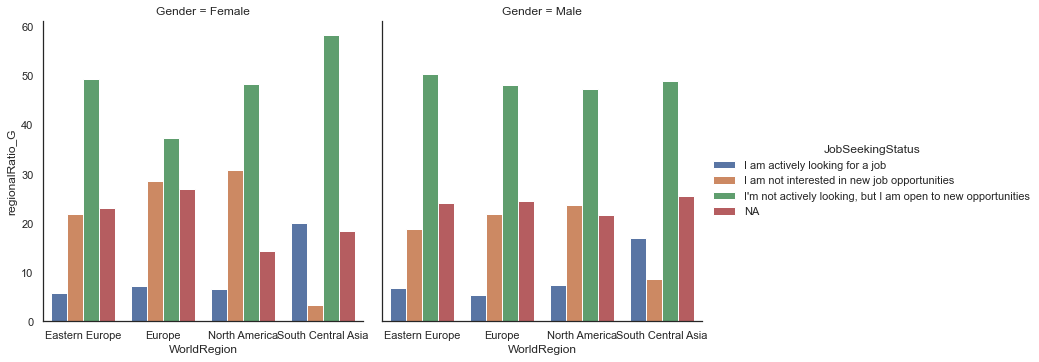

In [36]:
plt.figure(figsize=(15,5))
chart = sns.catplot(data = regionalSatisfaction_G,
            x = 'WorldRegion', 
            y = 'regionalRatio_G',
            hue = 'JobSeekingStatus',
            col = 'Gender',
            kind = 'bar',
            ci = None);
#chart.set_title('Job Seeking Status Proportion by World Region')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#chart.legend(loc='center left', bbox_to_anchor=(0.3, -0.5), ncol=1);

<p id='Q2'>
Of all the regions of interest Women are happier with their current job than Men, with the exception of South Central Asia where this is switched around.

Also when looking at professional open to new opportunities Woemn in Europe areless interested and women in South Central Asia most interested, while in Eastern Europe and North America it is middle of the road.
    
While professionals actively looking for a job is between 5% and 7% across Europe and North America for both Genders, in SouthCentral Asia women are by far more active than other regions and over their male counterparts.
    <p>

In [37]:
#  How does gender play a role?

#get average job satisfaction by world region and gender

JSWR_G = pd.DataFrame(df.query("(Professional == 'Professional developer' or Professional == 'Professional non-developer who sometimes writes code') and (Gender == 'Female' or Gender == 'Male') and (WorldRegion == 'Europe' or WorldRegion == 'North America' or WorldRegion == 'Eastern Europe' or WorldRegion == 'South Central Asia')").groupby(['WorldRegion', 'Gender']).mean()['JobSatisfaction'])
JSWR_G                                       
         

JobSatisfaction
WorldRegion        Gender                 
Eastern Europe     Female         6.977011
                   Male           6.999096
Europe             Female         6.710084
                   Male           6.932485
North America      Female         7.105590
                   Male           6.967413
South Central Asia Female         5.566667
                   Male           6.188302

In [38]:
#resetting index
JSWR_G.reset_index(inplace=True)


<p id='Q2'>
    
    
    
    
Plotting Mean Job Satisfactoin by World Region and Gender:
    <p>

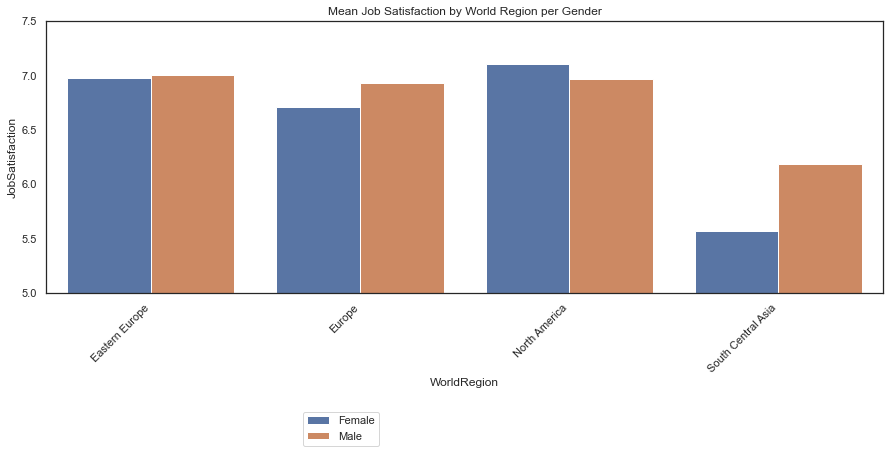

In [39]:
plt.figure(figsize=(15,5))
chart = sns.barplot(data = JSWR_G,
            x = 'WorldRegion', 
            y = 'JobSatisfaction',
            hue = 'Gender',
            ci = None)
chart.set_title('Mean Job Satisfaction by World Region per Gender')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set(ylim=(5, 7.5));
chart.legend(loc='center left', bbox_to_anchor=(0.3, -0.5), ncol=1);



In [40]:
#get average job satisfaction by world region, job seeking status and gender

JSWR_G = pd.DataFrame(df.query("(Professional == 'Professional developer' or Professional == 'Professional non-developer who sometimes writes code') and (Gender == 'Female' or Gender == 'Male') and (WorldRegion == 'Europe' or WorldRegion == 'North America' or WorldRegion == 'Eastern Europe' or WorldRegion == 'South Central Asia')").groupby(['WorldRegion', 'JobSeekingStatus', 'Gender']).mean()['JobSatisfaction'])

JSWR_G

JobSatisfaction
WorldRegion        JobSeekingStatus                                   Gender                 
Eastern Europe     I am actively looking for a job                    Female         3.600000
                                                                      Male           4.680000
                   I am not interested in new job opportunities       Female         7.947368
                                                                      Male           8.227053
                   I'm not actively looking, but I am open to new ... Female         6.906977
                                                                      Male           6.802867
                   NA                                                 Female         7.050000
                                                                      Male           7.109023
Europe             I am actively looking for a job                    Female         3.058824
                                                                      Male           4.076142
                   I am not interested in new job opportunities       Female         7.808824
                                                                      Male           8.104798
                   I'm not actively looking, but I am open to new ... Female         6.505618
                                                                      Male           6.659966
                   NA                                                 Female         6.796875
                                                                      Male           7.055430
North America      I am actively looking for a job                    Female         3.666667
                                                                      Male           3.854545
                   I am not interested in new job opportunities       Female         8.323232
                                                                      Male           8.335244
                   I'm not actively looking, but I am open to new ... Female         6.865385
                                                                      Male           6.812500
                   NA                                                 Female         6.869565
                                                                      Male           6.882075
South Central Asia I am actively looking for a job                    Female         3.333333
                                                                      Male           5.033613
                   I am not interested in new job opportunities       Female         6.500000
                                                                      Male           7.933333
                   I'm not actively looking, but I am open to new ... Female         6.028571
                                                                      Male           6.256560
                   NA                                                 Female         6.363636
                                                                      Male           6.240223

In [41]:
# resetting indexes
JSWR_G.reset_index(inplace=True)


<Figure size 1080x360 with 0 Axes>

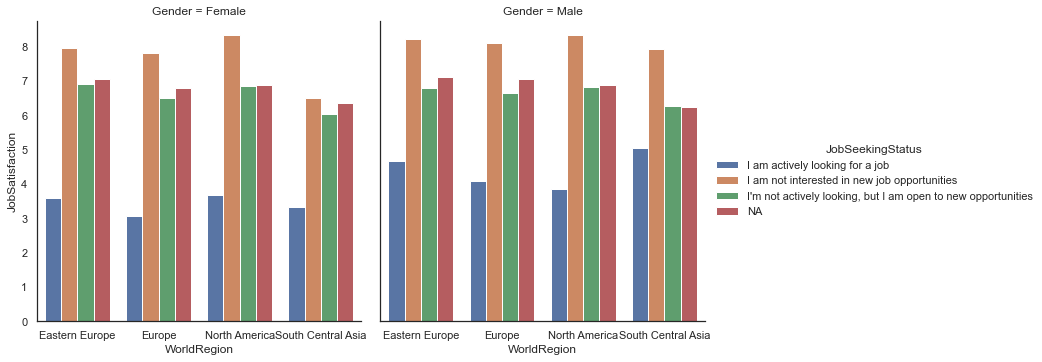

In [42]:
plt.figure(figsize=(15,5))
chart = sns.catplot(data = JSWR_G,
                    x = 'WorldRegion', 
                    y = 'JobSatisfaction',
                    hue = 'JobSeekingStatus',
                    col = 'Gender',
                    kind = 'bar',
                    ci = None);
#chart.set_title('Job Seeking Status Proportion by World Region')
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#chart.legend(loc='center left', bbox_to_anchor=(0.3, -0.5), ncol=1);

In [43]:
# resetting indexes
regionalSatisfaction.reset_index(inplace=True)


<p id='Q2'>
At a high level job satisfaction for women is lower than their male counterparts, except for North America where women seem to be happier with their jobs. In South Central Asia women are dissatisfied to a hihger degree than their counterparts in other regions. 
    
Women across the board need to be more dissatisfied with their jobs before starting to look for a job, but are just as open to new opportunities as men.
    
Women in Europe on the other hand, while they seem more dissatisfied with their jobs, are less interested in moving around, as opposed to their eastern european colleagues, while more satisfied are also more mobile.
    
For Women North America is the best place to be.  Higher job satisfaction, more opportunites and less desire to move around are indications of a better professional life for women in this region.
<p>

<h3 id='q1'>Question 3: Does Formal Education Influence Job Satisfaction by World Region? </h3>


In [44]:
#get average job satisfaction by Formal Education for the survey 

JSE = pd.DataFrame(df.query("(Professional == 'Professional developer' or Professional == 'Professional non-developer who sometimes writes code') and (Gender == 'Female' or Gender == 'Male') and (WorldRegion == 'Europe' or WorldRegion == 'North America' or WorldRegion == 'Eastern Europe' or WorldRegion == 'South Central Asia')").groupby(['FormalEducation']).mean()['JobSatisfaction'])
JSE_sorted = JSE.sort_values('JobSatisfaction', ascending=False)
JSE_sorted

,JobSatisfaction
FormalEducation,
Doctoral degree,7.322581
I never completed any formal education,7.200000
Some college/university study without earning a bachelor's degree,7.021355
Professional degree,6.980392
Secondary school,6.864686
Master's degree,6.845161
Bachelor's degree,6.835884
Primary/elementary school,6.560976
I prefer not to answer,6.525424


In [45]:
# Resetting INdex
JSE_sorted.reset_index(level=0, inplace=True)


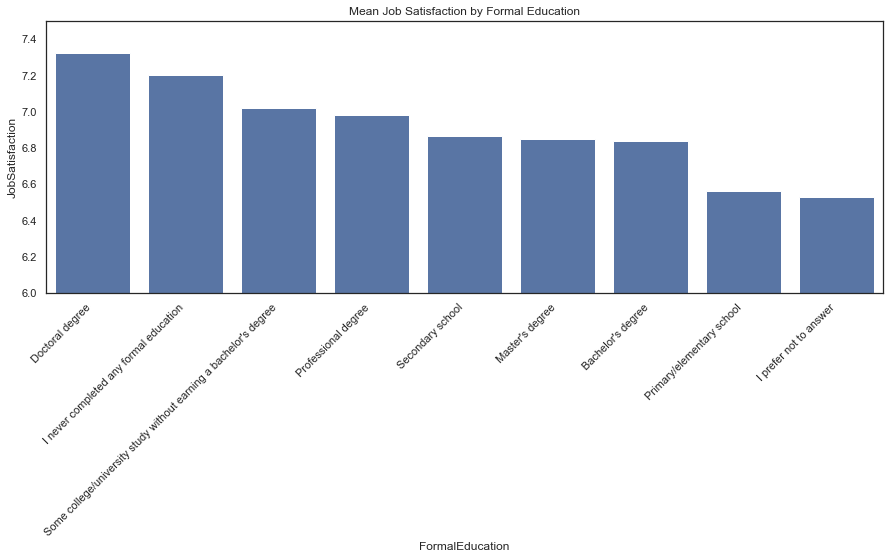

In [46]:
# plot Job Satisfaction by formal education for the survey

plt.figure(figsize=(15,5))
chart = sns.barplot(data = JSE_sorted,
            x = 'FormalEducation', 
            y = 'JobSatisfaction',
            ci = None,
            color = 'b')
chart.set_title('Mean Job Satisfaction by Formal Education')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set(ylim=(6, 7.5));
#chart.legend(loc='center left', bbox_to_anchor=(0.3, -0.5), ncol=1);

In [47]:
#get average job satisfaction by world region and Formal Education

JS_edu = pd.DataFrame(df.query("(Professional == 'Professional developer' or Professional == 'Professional non-developer who sometimes writes code') and (Gender == 'Female' or Gender == 'Male') and FormalEducation != 'I prefer not to answer' and (WorldRegion == 'Europe' or WorldRegion == 'North America' or WorldRegion == 'Eastern Europe' or WorldRegion == 'South Central Asia')").sort_values(by=['JobSatisfaction'],ascending=False).groupby(['WorldRegion', 'FormalEducation']).mean()['JobSatisfaction'])
JS_edu
JS_edu.reset_index(inplace=True)

JS_edu


,WorldRegion,FormalEducation,JobSatisfaction
0,Eastern Europe,Bachelor's degree,6.879607
1,Eastern Europe,Doctoral degree,7.086957
2,Eastern Europe,I never completed any formal education,6.000000
3,Eastern Europe,Master's degree,6.988345
4,Eastern Europe,Primary/elementary school,6.444444
5,Eastern Europe,Professional degree,6.434783
6,Eastern Europe,Secondary school,7.369748
7,Eastern Europe,Some college/university study without earning ...,7.085366
8,Europe,Bachelor's degree,6.940665
9,Europe,Doctoral degree,7.379808


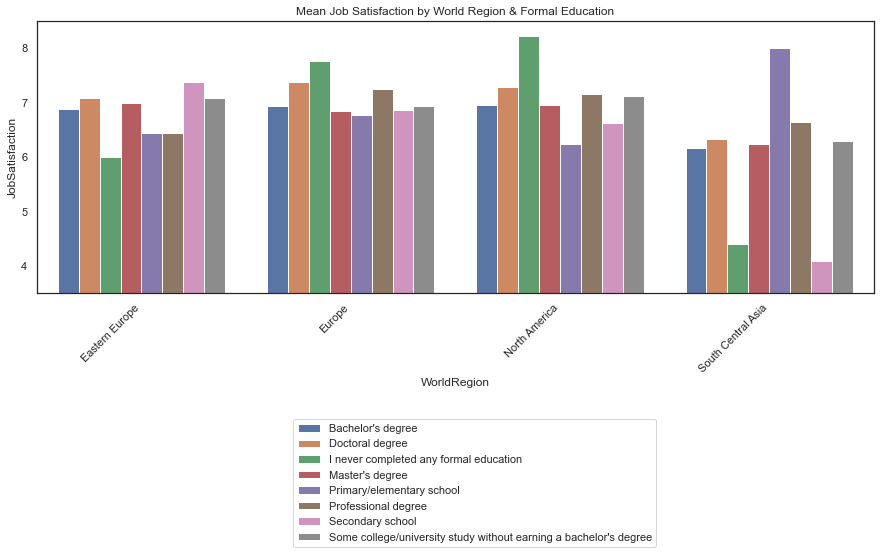

In [48]:
# produce a plot  shoing job satisfaction by World region and formal education

plt.figure(figsize=(15,5))
sns.set(style="white", font_scale = 1)
chart = sns.barplot(data = JS_edu,
            x = 'WorldRegion', 
            y = 'JobSatisfaction',
            hue = 'FormalEducation',
            #height = 8,
            #aspect = 3,
            ci = None
            )
chart.set_title('Mean Job Satisfaction by World Region & Formal Education')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.legend(loc='center left', bbox_to_anchor=(0.3, -0.7), ncol=1)
chart.set(ylim=(3.5, 8.5));


<p id='Q3'>
Overall Job Satisfaction is highest among people with a Doctoral degree, followed by people with no formal education or people with some college but no degree. 

When taking into account the world region this seems to hold true for North America and Europe.  Professionals in these 2 regions have good chances at a good job even if they have no formal college degree.
    
Europe has better job satisfaction across education levels, indicating there are good jobs for professionals form all walks of life.  In North America howeever, professionals with only primary or high school level educatoin are not as happy.
    
Europe is the place to be for professionals at all levels of education.  In North America at least some college or a professional degree would be required to have a satisfying job although those without completing a fomral education are the most satisfied.
    
Eastern Europe is also a region to conisder, South Central Asia however has the least satsified people across the board , except for those with only primary school education, who have the highest satisfaction across all regions.
    <p>